In [1]:
import pandas as pd
import numpy as np
#import dataset
movie_data=pd.read_csv("u.data",sep="\t",names=['user_id','item_id','ratings',"timestamp"])
movie_data.head(2)

,user_id,item_id,ratings,timestamp
0,0,50,5,881250949
1,0,172,5,881250949


In [2]:
#import dataset
movie_title=pd.read_csv('Movie_Id_Titles')

In [3]:
#marge dataset
df=pd.merge(movie_data,movie_title,on='item_id')
df.head(2)

,user_id,item_id,ratings,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)


EDA

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [5]:
#find the ratings mean value
df.groupby('title')['ratings'].mean().sort_values(ascending=False)

title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: ratings, Length: 1664, dtype: float64

In [6]:
#count the ratings
df.groupby('title')['ratings'].count().sort_values(ascending=False)

title
Star Wars (1977)                              584
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: ratings, Length: 1664, dtype: int64

In [7]:
#create dataframe ro store movie title ratings mean value and the count of ratings value
ratings=pd.DataFrame(df.groupby('title')['ratings'].mean())
ratings['no_of_ratings']=df.groupby('title')['ratings'].count()
ratings.head()

,ratings,no_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<Figure size 720x288 with 0 Axes>

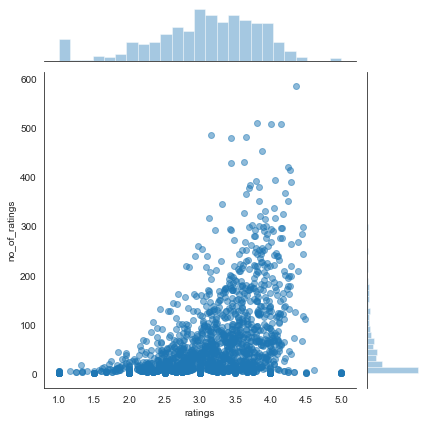

In [8]:

plt.figure(figsize=(10,4))
sns.jointplot(x='ratings',y='no_of_ratings',data=ratings,alpha=0.5)

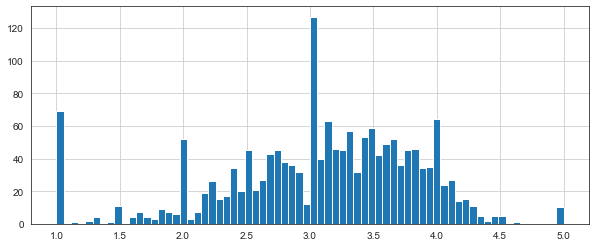

In [9]:
plt.figure(figsize=(10,4))
ratings['ratings'].hist(bins=70)

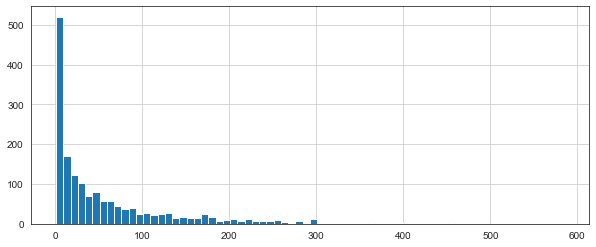

In [10]:
plt.figure(figsize=(10,4))
ratings['no_of_ratings'].hist(bins=70)

In [11]:
# create a pivot table to store user rating
movie_pivot=df.pivot_table(index='user_id',columns='title',values='ratings')

In [12]:
ratings.sort_values('no_of_ratings',ascending=False).head()

,ratings,no_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [13]:
#store all ratings from movie pivot pable
star_war_user_rating=movie_pivot['Star Wars (1977)']
liar_liar_user_rating=movie_pivot['Liar Liar (1997)']

In [14]:
#find the correlation between the movies
corr_with_star_war=movie_pivot.corrwith(star_war_user_rating)
corr_with_liar_liar=movie_pivot.corrwith(liar_liar_user_rating)


C:\Users\NANDAN\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\NANDAN\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [15]:
#create a dataframe to store the movies hioghly correlate with star movie
corr_starwar=pd.DataFrame(corr_with_star_war,columns=['Correlation'])
corr_starwar.dropna(inplace=True)
corr_starwar=corr_starwar.join(ratings['no_of_ratings'])

In [16]:
corr_starwar[corr_starwar['no_of_ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,no_of_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [17]:
corr_liarliar=pd.DataFrame(corr_with_liar_liar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar=corr_liarliar.join(ratings['no_of_ratings'])

In [18]:
corr_liarliar[corr_liarliar['no_of_ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,no_of_ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
